# Exploratory Data Analysis - Heart Disease UCI Dataset
## MLOps Assignment - Task 1

**Objective:** Perform comprehensive EDA on the Heart Disease dataset to understand:
- Data quality and missing values
- Feature distributions
- Correlations between features
- Class balance
- Insights for feature engineering

**Dataset:** Heart Disease UCI Dataset (303 samples, 13 features + 1 target)

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.precision', 3)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading and Initial Inspection

In [2]:
# Load the dataset
df = pd.read_csv('../data/heart_disease.csv')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

Dataset loaded successfully!
Shape: (303, 14)

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
# Dataset information
print("Dataset Information:")
print("="*70)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [4]:
# Statistical summary
print("Statistical Summary:")
print("="*70)
df.describe().T

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.439,9.039,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.680,0.467,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158,0.960,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.690,17.600,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693,51.777,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.149,0.356,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990,0.995,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607,22.875,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.327,0.470,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.040,1.161,0.0,0.0,0.8,1.6,6.2


## 2. Missing Values Analysis

In [5]:
# Check missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percent
}).sort_values('Missing_Count', ascending=False)

print("Missing Values Summary:")
print("="*70)
print(missing_df[missing_df['Missing_Count'] > 0])
print(f"\nTotal missing values: {missing_values.sum()}")

Missing Values Summary:
      Missing_Count  Percentage
ca                4        1.32
thal              2        0.66

Total missing values: 6


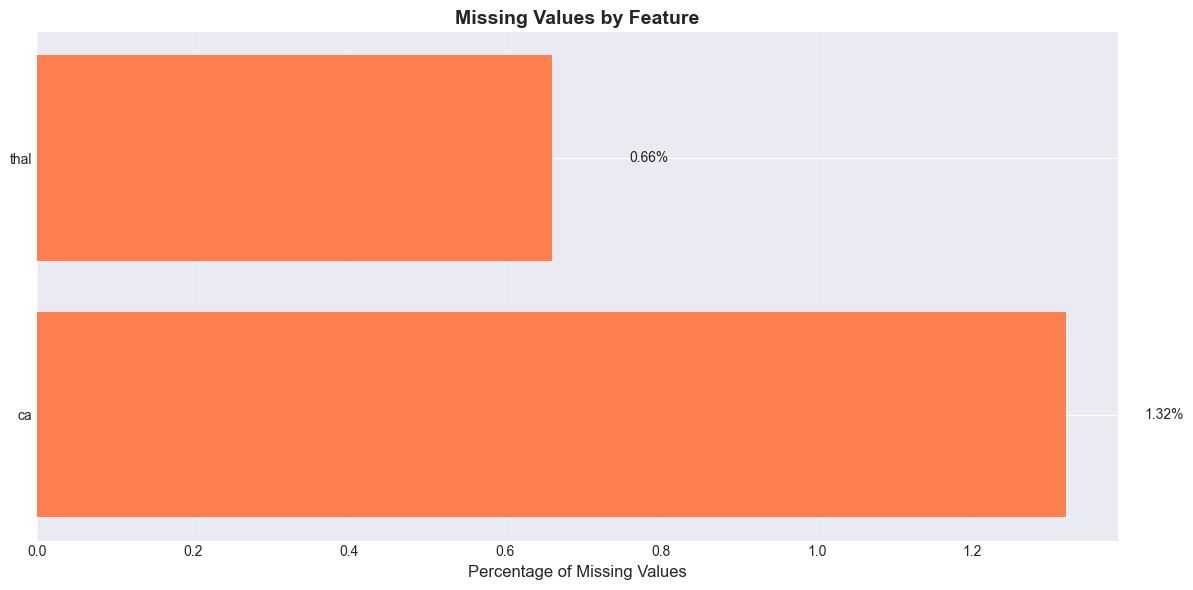

In [6]:
# Visualize missing values
fig, ax = plt.subplots(figsize=(12, 6))
missing_data = missing_df[missing_df['Missing_Count'] > 0]

if len(missing_data) > 0:
    ax.barh(missing_data.index, missing_data['Percentage'], color='coral')
    ax.set_xlabel('Percentage of Missing Values', fontsize=12)
    ax.set_title('Missing Values by Feature', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(missing_data['Percentage']):
        ax.text(v + 0.1, i, f'{v:.2f}%', va='center')
else:
    ax.text(0.5, 0.5, 'No Missing Values Found!', 
            ha='center', va='center', fontsize=16, transform=ax.transAxes)

plt.tight_layout()
plt.savefig('../screenshots/01_missing_values.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. Target Variable Analysis

In [7]:
# Target distribution
target_counts = df['target'].value_counts()
target_percentages = df['target'].value_counts(normalize=True) * 100

print("Target Variable Distribution:")
print("="*70)
print(f"Class 0 (No Disease): {target_counts[0]} ({target_percentages[0]:.2f}%)")
print(f"Class 1 (Disease): {target_counts[1]} ({target_percentages[1]:.2f}%)")
print(f"\nClass Balance Ratio: {target_counts[1]/target_counts[0]:.2f}")

Target Variable Distribution:
Class 0 (No Disease): 164 (54.13%)
Class 1 (Disease): 139 (45.87%)

Class Balance Ratio: 0.85


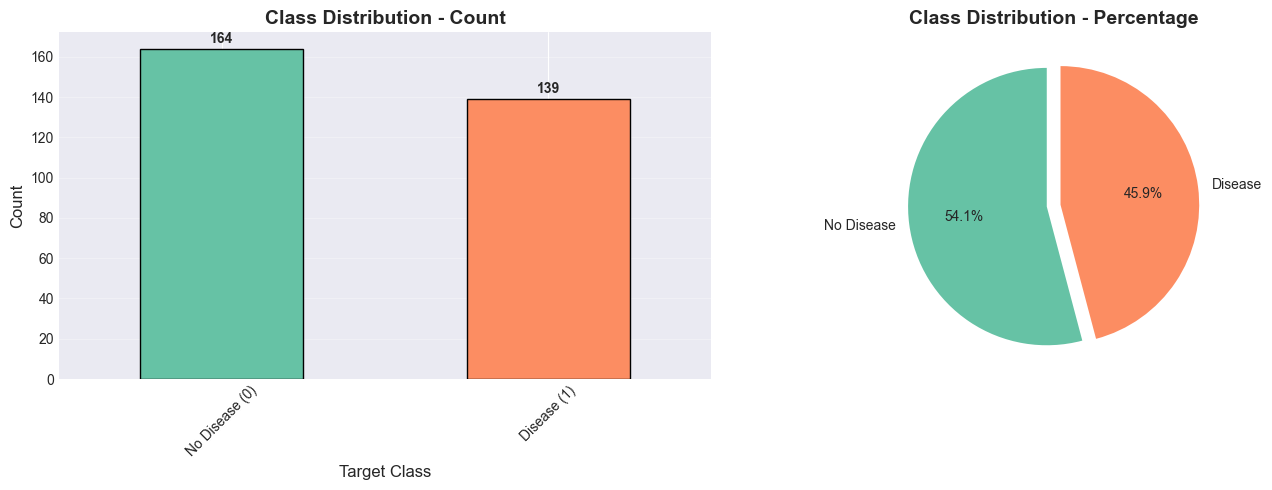

In [8]:
# Visualize class balance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
colors = ['#66c2a5', '#fc8d62']
target_counts.plot(kind='bar', ax=axes[0], color=colors, edgecolor='black')
axes[0].set_title('Class Distribution - Count', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Target Class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['No Disease (0)', 'Disease (1)'], rotation=45)
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate(target_counts):
    axes[0].text(i, v + 3, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(target_counts, labels=['No Disease', 'Disease'], autopct='%1.1f%%',
            colors=colors, startangle=90, explode=(0.05, 0.05))
axes[1].set_title('Class Distribution - Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../screenshots/02_class_balance.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Feature Distributions

In [9]:
# Separate numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

print(f"Numerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")

Numerical Features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Categorical Features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


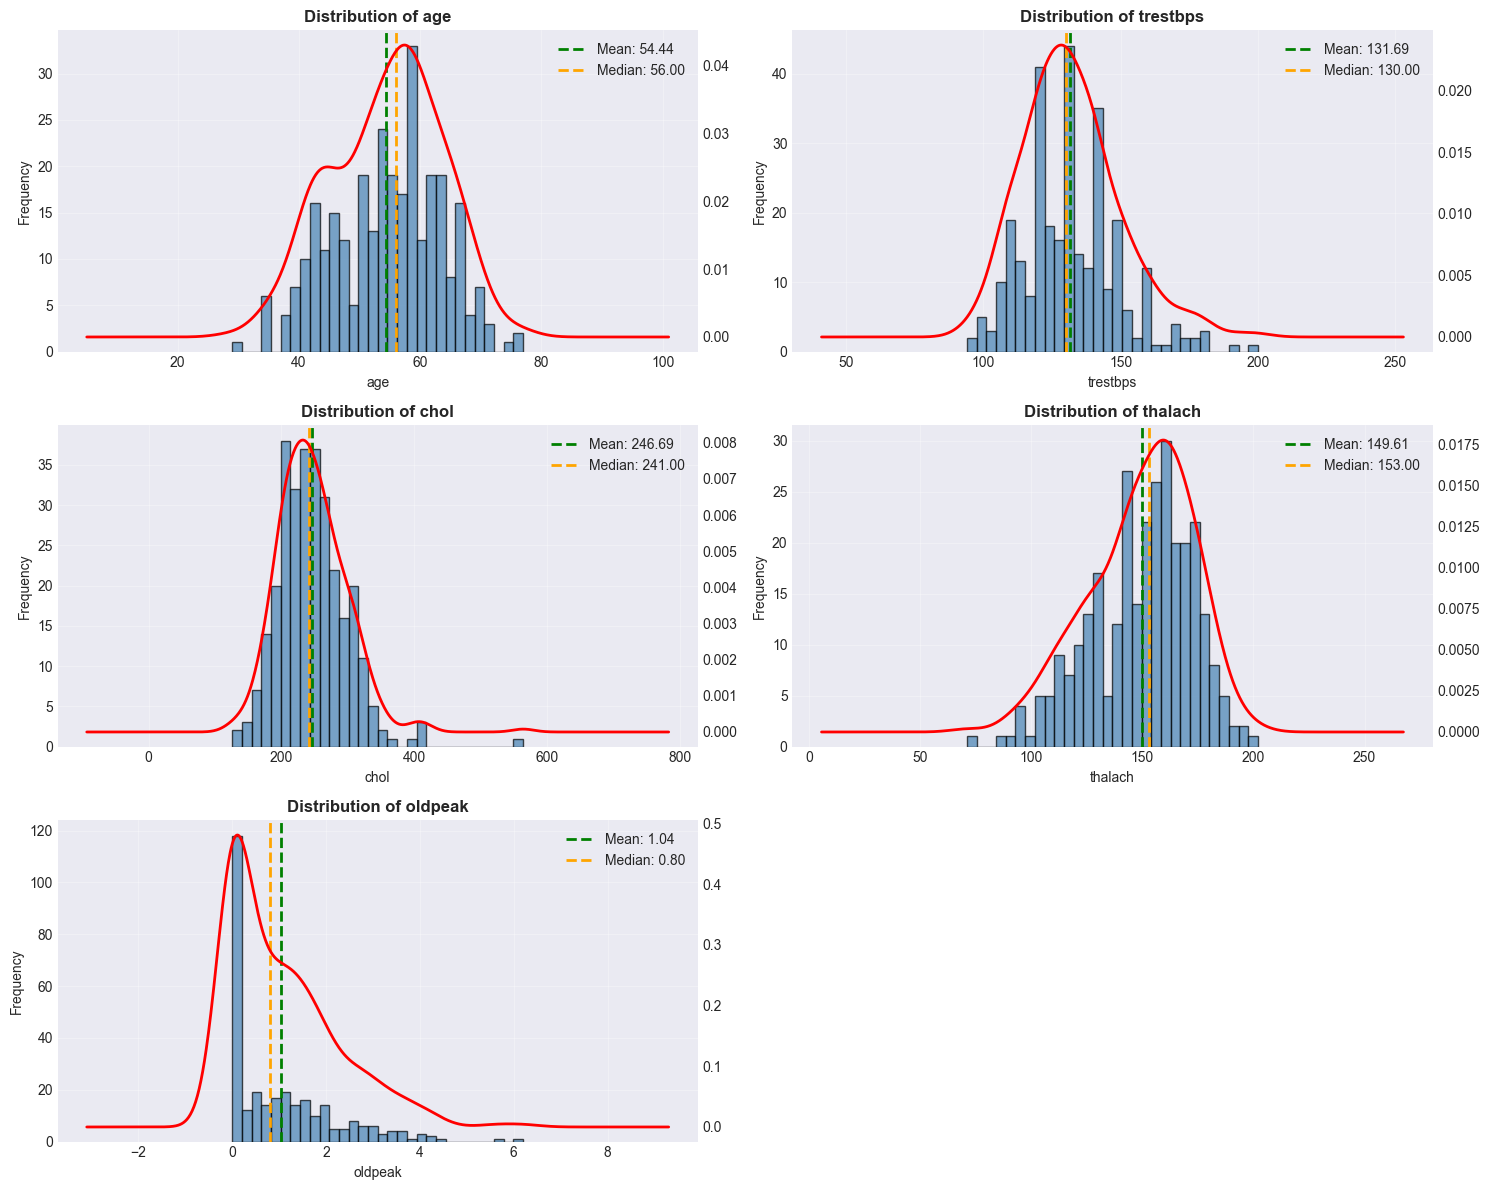

In [10]:
# Distribution of numerical features
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    # Histogram with KDE
    axes[idx].hist(df[feature].dropna(), bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    
    # Add KDE
    df[feature].dropna().plot(kind='kde', ax=axes[idx], secondary_y=True, color='red', linewidth=2)
    
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].grid(alpha=0.3)
    
    # Add statistics
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    axes[idx].axvline(mean_val, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='orange', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx].legend()

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.savefig('../screenshots/03_numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

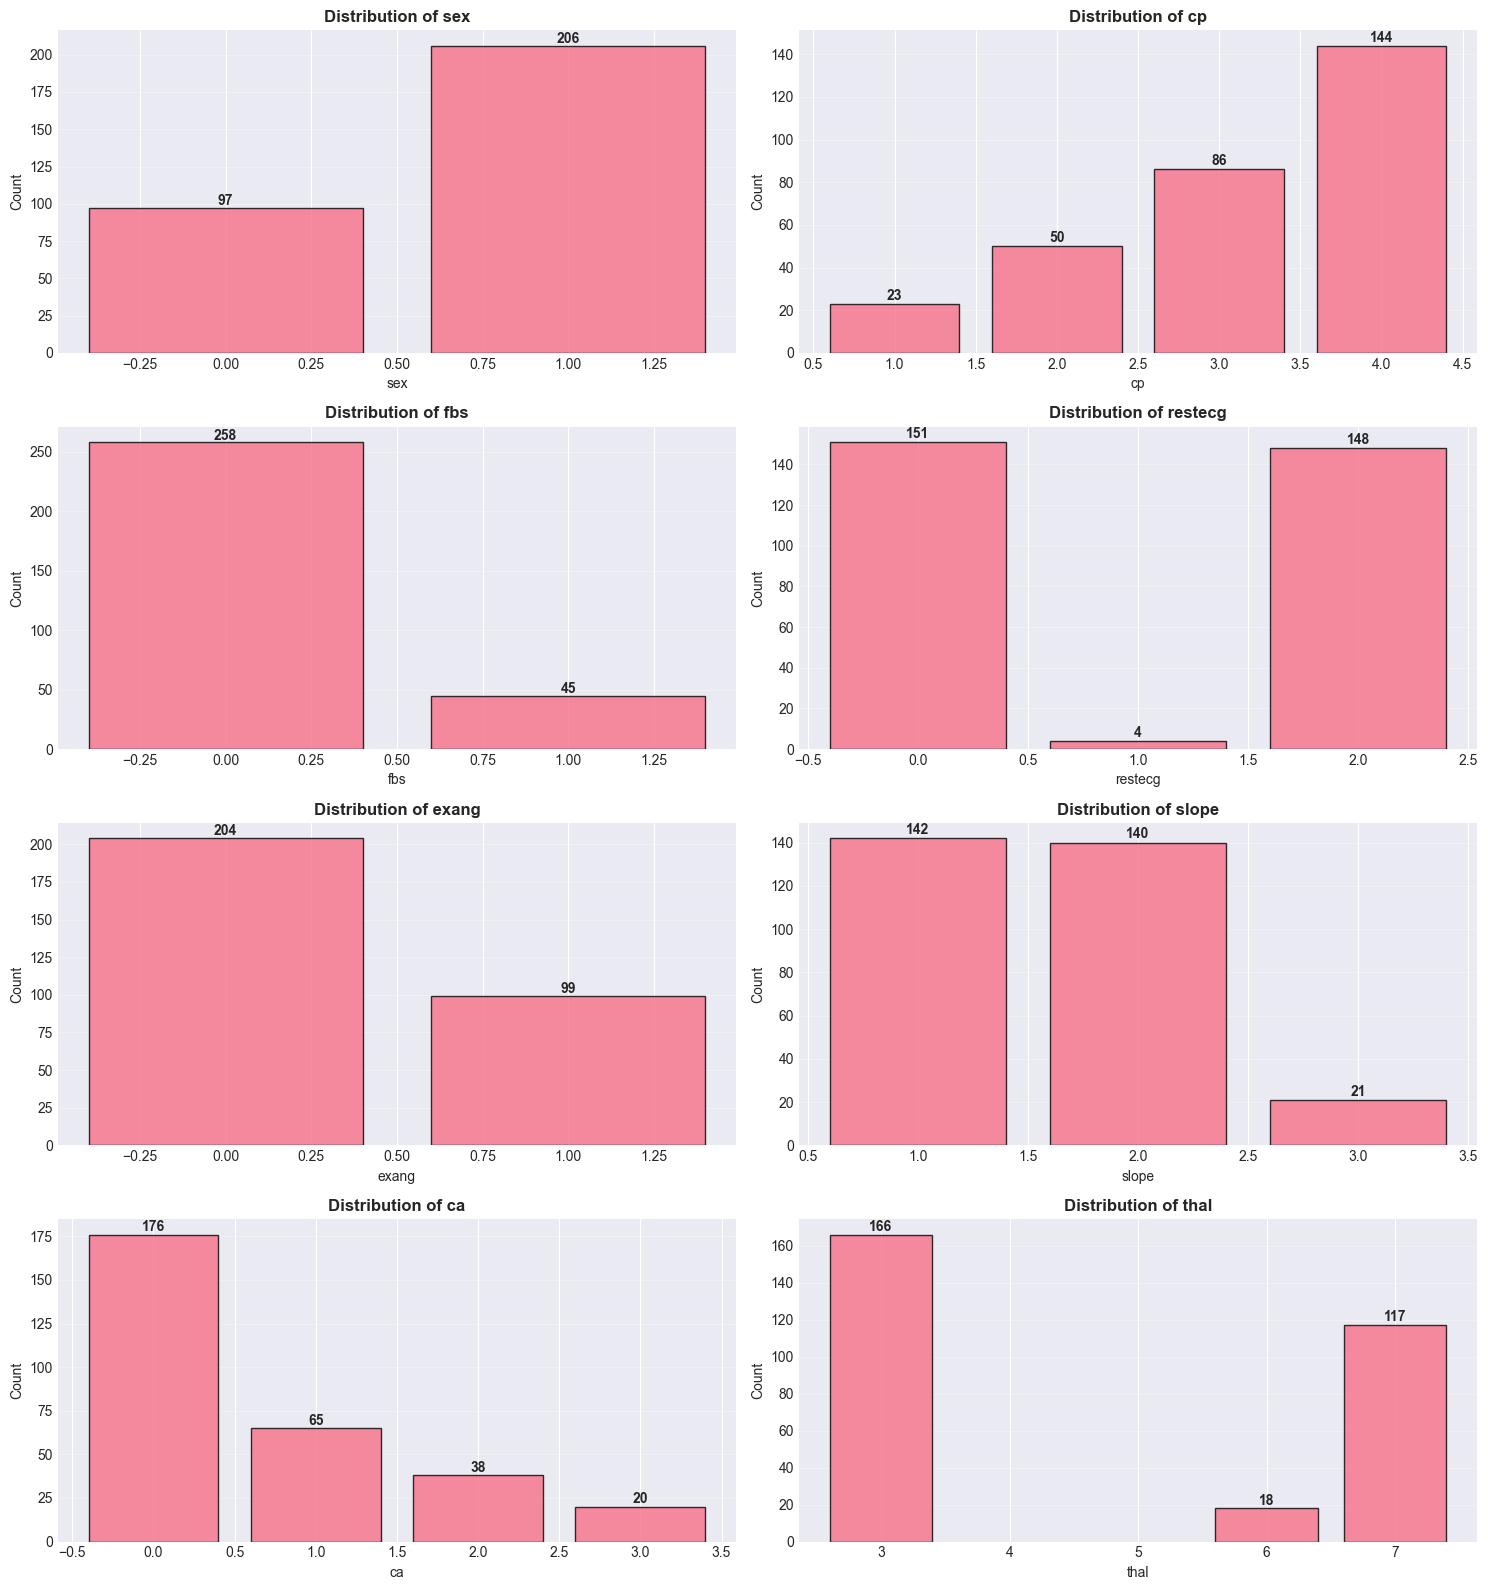

In [11]:
# Distribution of categorical features
fig, axes = plt.subplots(4, 2, figsize=(15, 16))
axes = axes.ravel()

for idx, feature in enumerate(categorical_features):
    value_counts = df[feature].value_counts().sort_index()
    
    axes[idx].bar(value_counts.index, value_counts.values, edgecolor='black', alpha=0.8)
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Count', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(value_counts.values):
        axes[idx].text(value_counts.index[i], v + 2, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../screenshots/04_categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Correlation Analysis

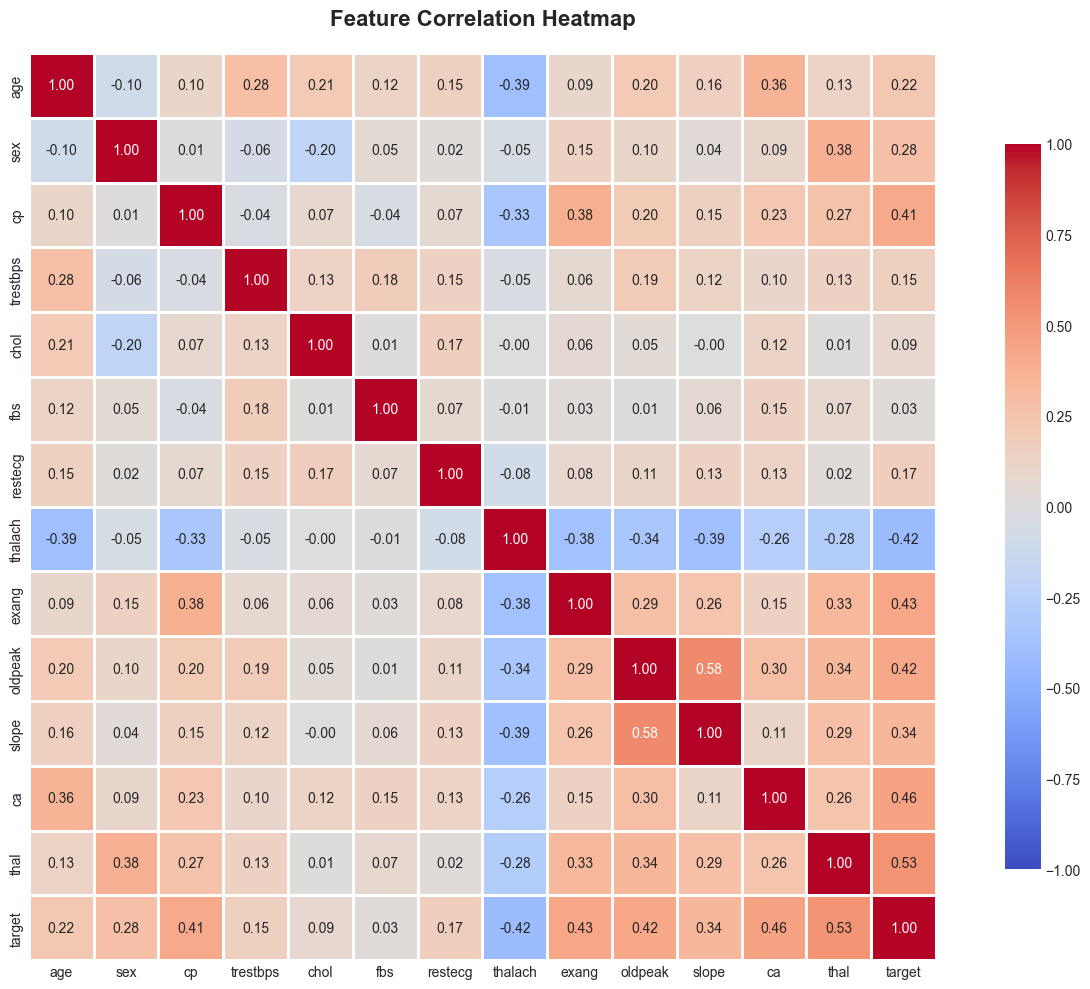


Top Correlations with Target:
target      1.000
thal        0.526
ca          0.460
exang       0.432
oldpeak     0.425
cp          0.414
slope       0.339
sex         0.277
age         0.223
restecg     0.169
trestbps    0.151
chol        0.085
fbs         0.025
thalach    -0.417
Name: target, dtype: float64


In [12]:
# Correlation matrix
correlation_matrix = df.corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(14, 10))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax)

ax.set_title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../screenshots/05_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Top correlations with target
target_corr = correlation_matrix['target'].sort_values(ascending=False)
print("\nTop Correlations with Target:")
print("="*70)
print(target_corr)

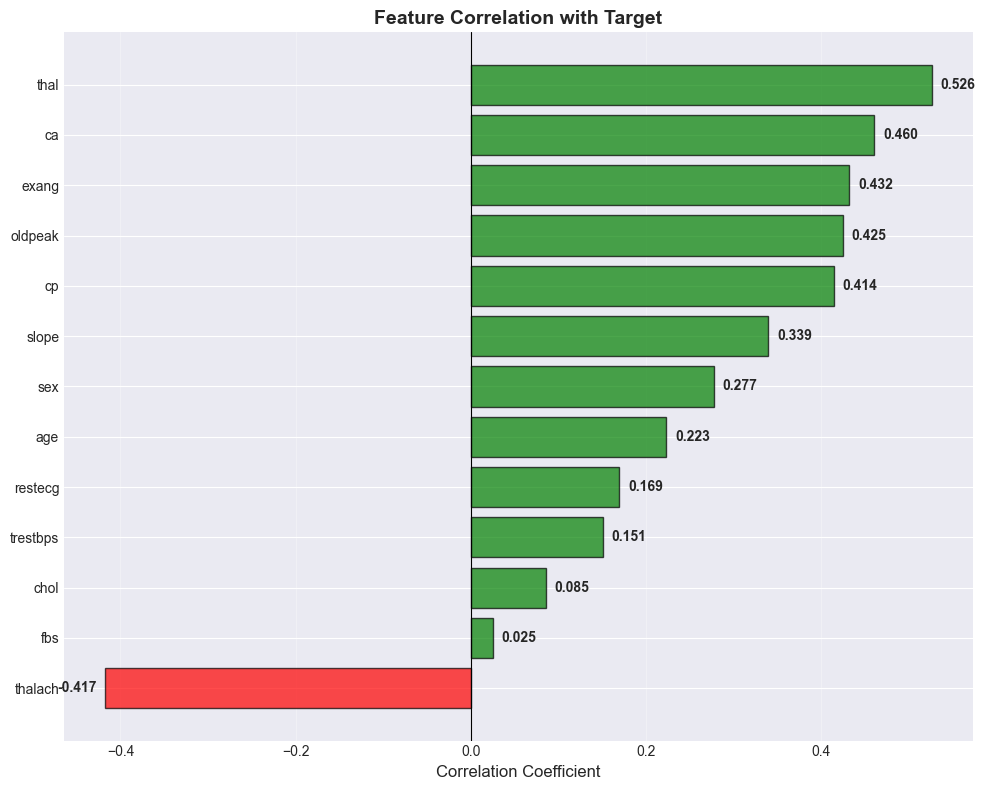

In [13]:
# Visualize top correlations with target
fig, ax = plt.subplots(figsize=(10, 8))

target_corr_sorted = target_corr.drop('target').sort_values()
colors_corr = ['red' if x < 0 else 'green' for x in target_corr_sorted]

ax.barh(range(len(target_corr_sorted)), target_corr_sorted.values, color=colors_corr, alpha=0.7, edgecolor='black')
ax.set_yticks(range(len(target_corr_sorted)))
ax.set_yticklabels(target_corr_sorted.index)
ax.set_xlabel('Correlation Coefficient', fontsize=12)
ax.set_title('Feature Correlation with Target', fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(target_corr_sorted.values):
    ax.text(v + 0.01 if v > 0 else v - 0.01, i, f'{v:.3f}', 
            va='center', ha='left' if v > 0 else 'right', fontweight='bold')

plt.tight_layout()
plt.savefig('../screenshots/06_target_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Bivariate Analysis - Features vs Target

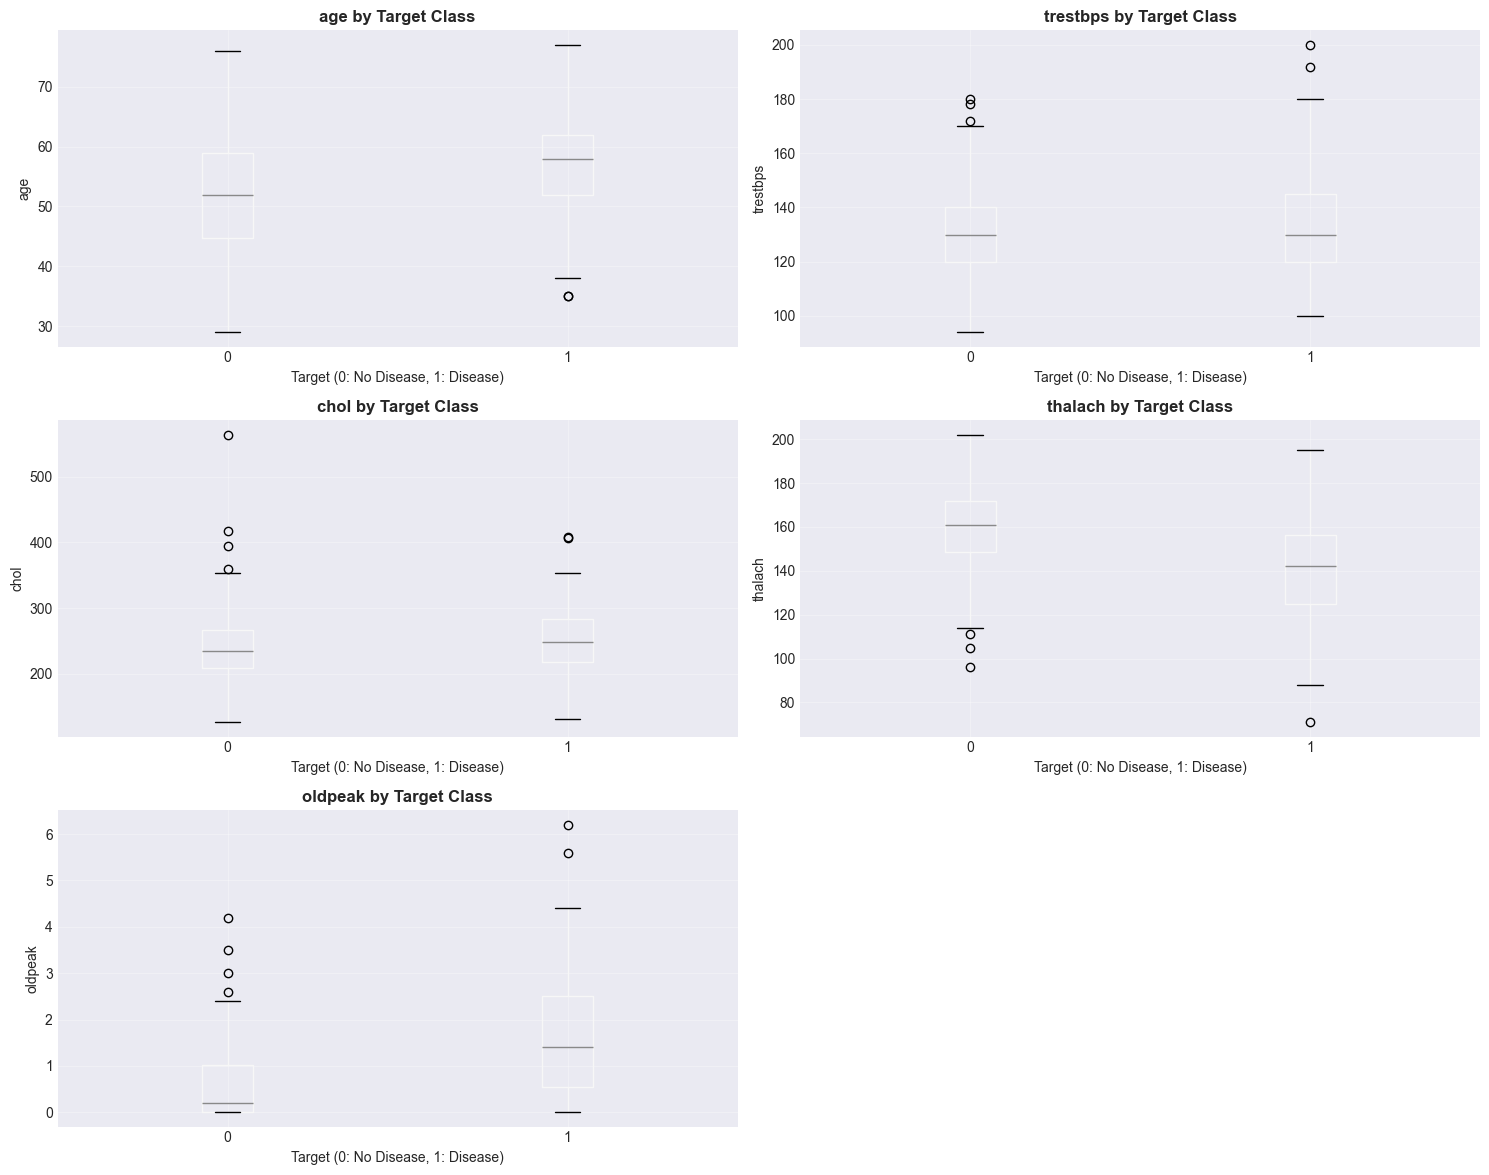

In [14]:
# Box plots for numerical features by target
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    df.boxplot(column=feature, by='target', ax=axes[idx])
    axes[idx].set_title(f'{feature} by Target Class', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Target (0: No Disease, 1: Disease)', fontsize=10)
    axes[idx].set_ylabel(feature, fontsize=10)
    axes[idx].grid(alpha=0.3)

# Remove extra subplot
fig.delaxes(axes[5])
plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.savefig('../screenshots/07_numerical_vs_target.png', dpi=300, bbox_inches='tight')
plt.show()

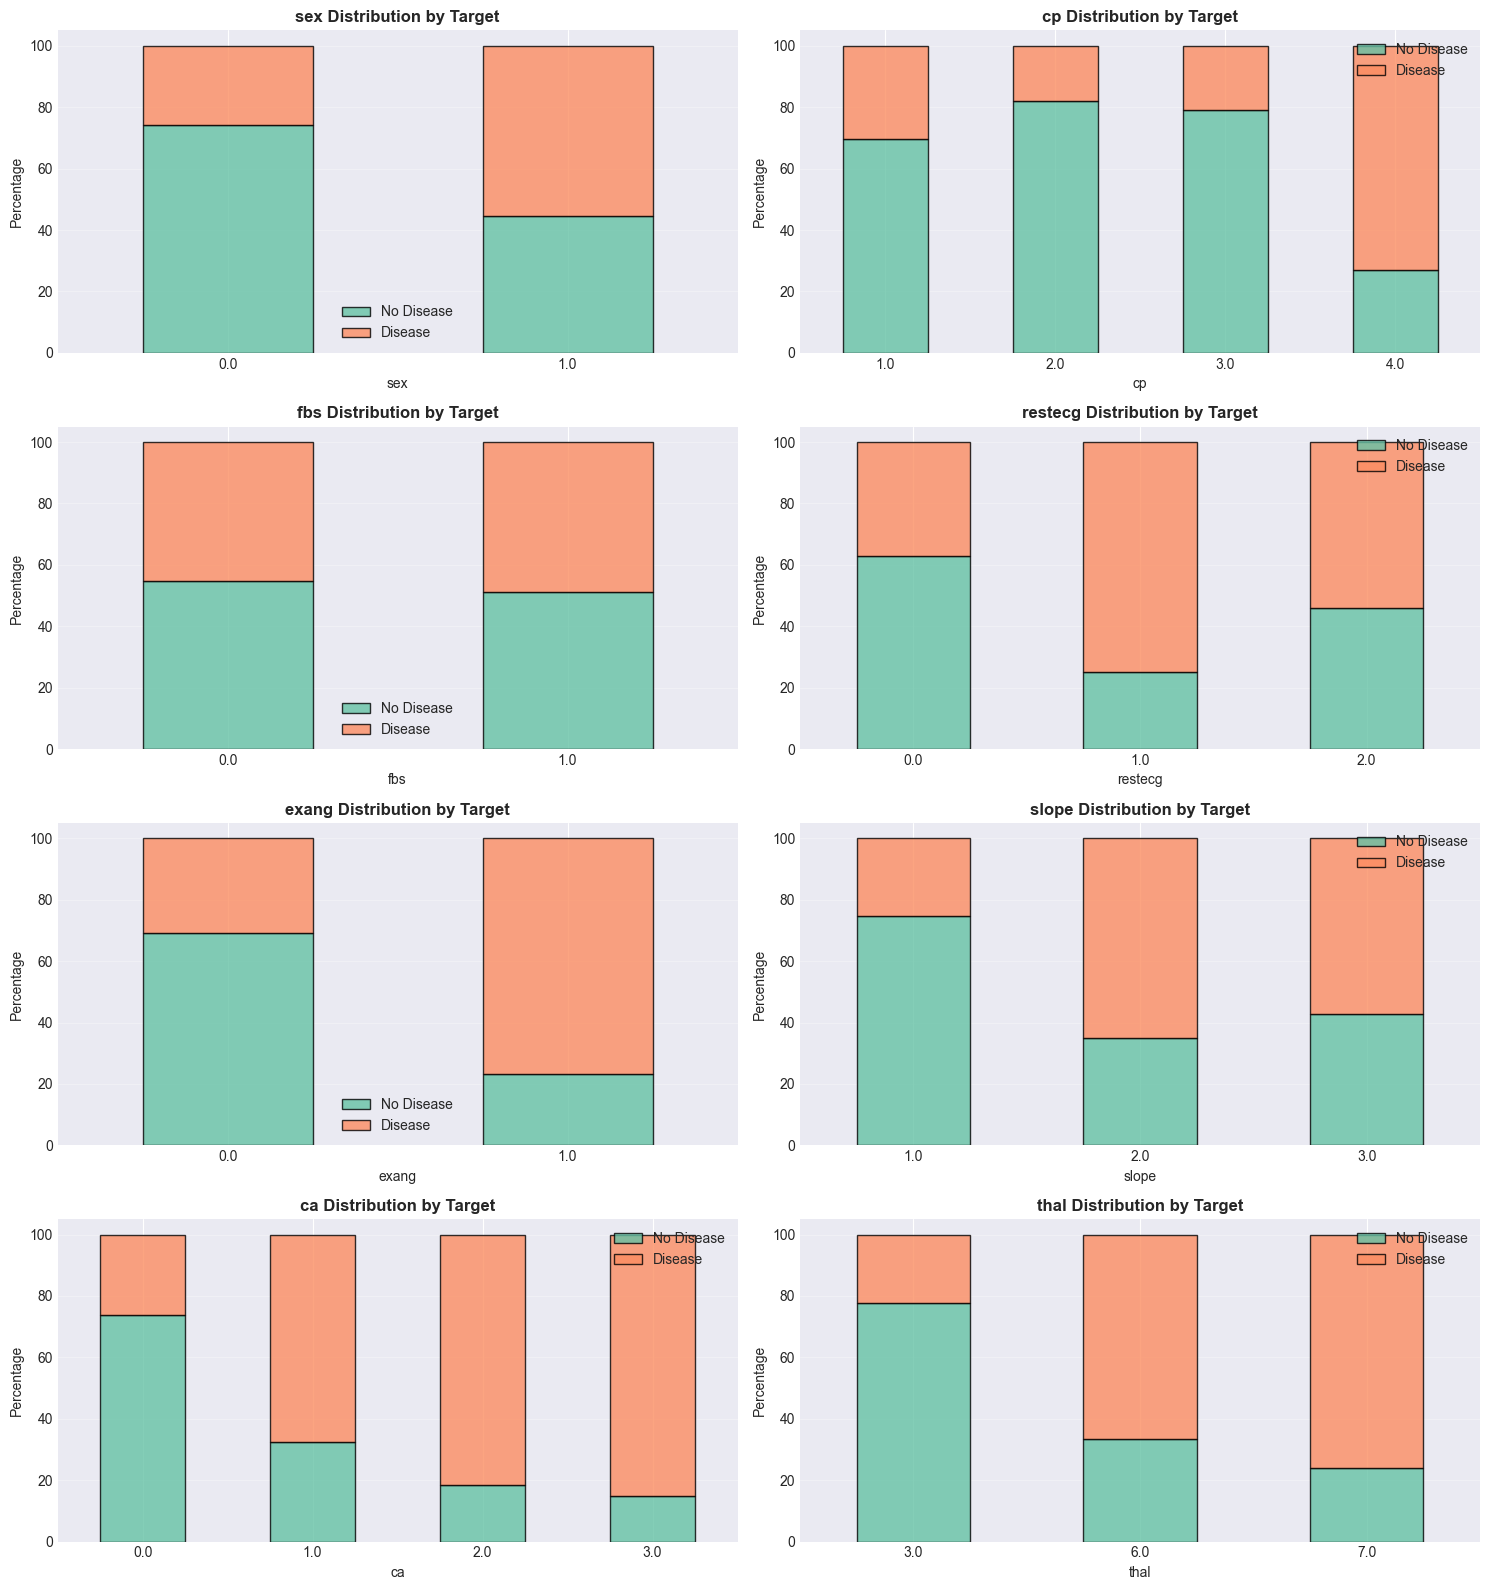

In [15]:
# Stacked bar charts for categorical features
fig, axes = plt.subplots(4, 2, figsize=(15, 16))
axes = axes.ravel()

for idx, feature in enumerate(categorical_features):
    ct = pd.crosstab(df[feature], df['target'], normalize='index') * 100
    
    ct.plot(kind='bar', stacked=True, ax=axes[idx], color=['#66c2a5', '#fc8d62'], 
            edgecolor='black', alpha=0.8)
    
    axes[idx].set_title(f'{feature} Distribution by Target', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Percentage', fontsize=10)
    axes[idx].legend(['No Disease', 'Disease'], loc='best')
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.savefig('../screenshots/08_categorical_vs_target.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Outlier Detection

In [16]:
# Detect outliers using IQR method
def detect_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("Outlier Analysis:")
print("="*70)

outlier_summary = []
for feature in numerical_features:
    n_outliers, lower, upper = detect_outliers_iqr(df, feature)
    outlier_summary.append({
        'Feature': feature,
        'Outliers': n_outliers,
        'Percentage': f"{(n_outliers/len(df))*100:.2f}%",
        'Lower_Bound': f"{lower:.2f}",
        'Upper_Bound': f"{upper:.2f}"
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df)

Outlier Analysis:
    Feature  Outliers Percentage Lower_Bound Upper_Bound
0       age         0      0.00%       28.50       80.50
1  trestbps         9      2.97%       90.00      170.00
2      chol         5      1.65%      115.00      371.00
3   thalach         1      0.33%       84.75      214.75
4   oldpeak         5      1.65%       -2.40        4.00


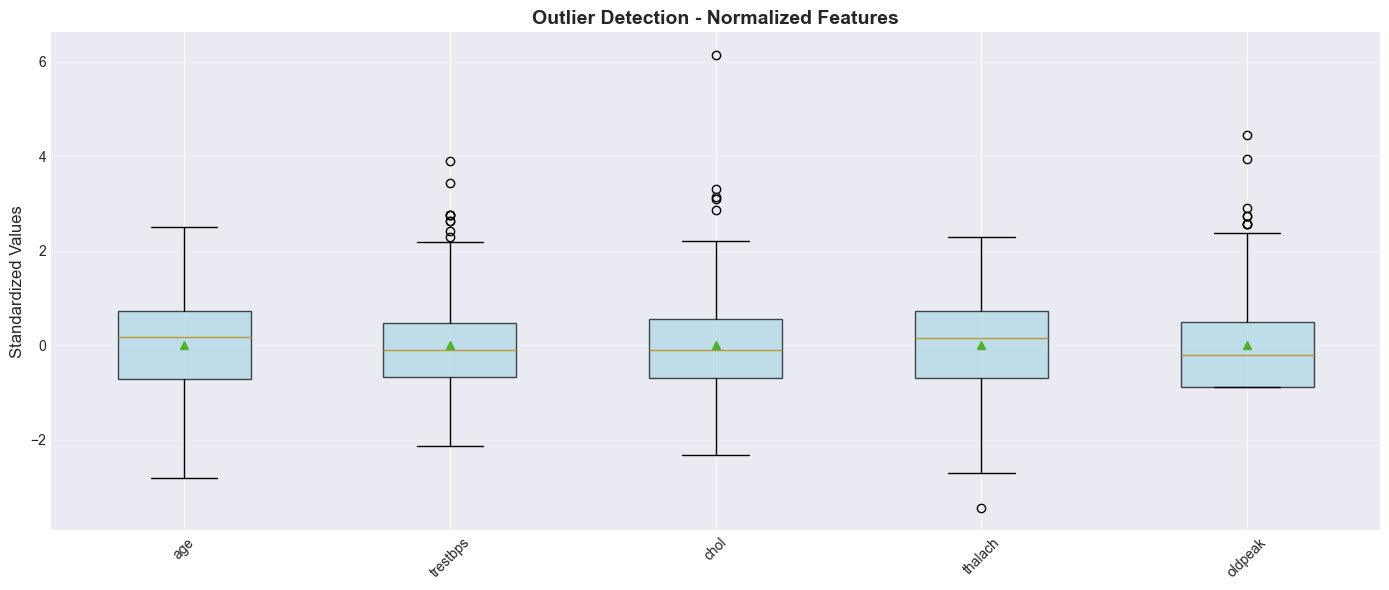

In [17]:
# Box plot for all numerical features
fig, ax = plt.subplots(figsize=(14, 6))

# Normalize data for better visualization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_normalized = pd.DataFrame(
    scaler.fit_transform(df[numerical_features]),
    columns=numerical_features
)

bp = ax.boxplot([df_normalized[col].dropna() for col in numerical_features],
                 labels=numerical_features,
                 patch_artist=True,
                 showmeans=True)

# Customize box plot
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.7)

ax.set_title('Outlier Detection - Normalized Features', fontsize=14, fontweight='bold')
ax.set_ylabel('Standardized Values', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../screenshots/09_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Pair Plot Analysis

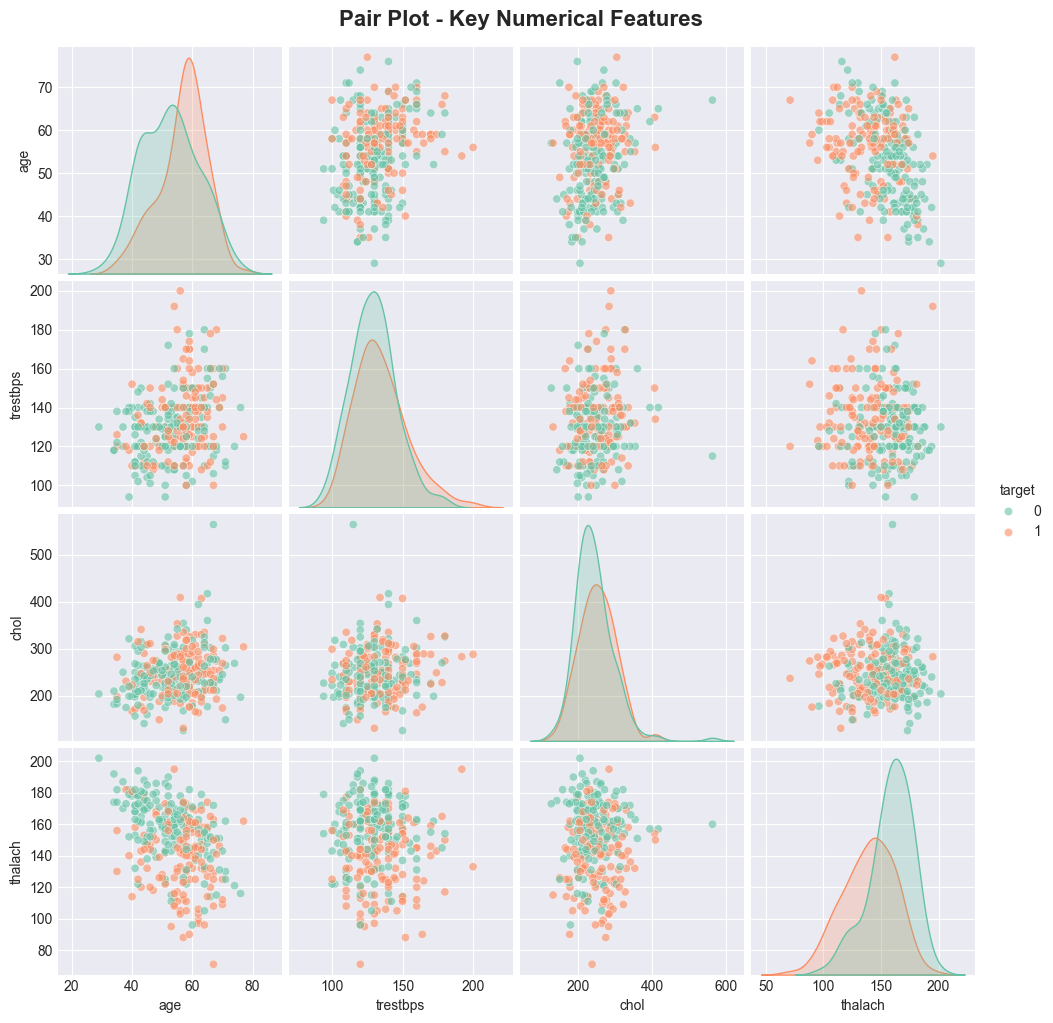

In [18]:
# Create pair plot for key numerical features
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'target']
pair_plot = sns.pairplot(df[selected_features], hue='target', 
                         palette={0: '#66c2a5', 1: '#fc8d62'},
                         diag_kind='kde', plot_kws={'alpha': 0.6})

pair_plot.fig.suptitle('Pair Plot - Key Numerical Features', y=1.02, fontsize=16, fontweight='bold')
plt.savefig('../screenshots/10_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

## 9. Statistical Tests

In [19]:
# T-tests for numerical features
from scipy.stats import ttest_ind

print("Statistical Significance Tests (T-test):")
print("="*70)

stat_results = []
for feature in numerical_features:
    group0 = df[df['target'] == 0][feature].dropna()
    group1 = df[df['target'] == 1][feature].dropna()
    
    t_stat, p_value = ttest_ind(group0, group1)
    
    stat_results.append({
        'Feature': feature,
        'T-Statistic': f"{t_stat:.4f}",
        'P-Value': f"{p_value:.4f}",
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    })

stat_df = pd.DataFrame(stat_results)
print(stat_df)

Statistical Significance Tests (T-test):
    Feature T-Statistic P-Value Significant
0       age     -3.9711  0.0001         Yes
1  trestbps     -2.6470  0.0085         Yes
2      chol     -1.4829  0.1391          No
3   thalach      7.9636  0.0000         Yes
4   oldpeak     -8.1343  0.0000         Yes


## 10. Data Quality Summary and Insights

In [20]:
print("="*70)
print("DATA QUALITY SUMMARY")
print("="*70)

print(f"\n1. DATASET SIZE:")
print(f"   - Total Samples: {len(df)}")
print(f"   - Features: {len(df.columns) - 1}")
print(f"   - Numerical: {len(numerical_features)}")
print(f"   - Categorical: {len(categorical_features)}")

print(f"\n2. MISSING VALUES:")
total_missing = df.isnull().sum().sum()
print(f"   - Total: {total_missing} ({(total_missing/(len(df)*len(df.columns)))*100:.2f}%)")
if total_missing > 0:
    print(f"   - Features affected: {missing_df[missing_df['Missing_Count'] > 0].index.tolist()}")

print(f"\n3. CLASS BALANCE:")
print(f"   - Class 0: {target_counts[0]} ({target_percentages[0]:.2f}%)")
print(f"   - Class 1: {target_counts[1]} ({target_percentages[1]:.2f}%)")
print(f"   - Balance Status: {'Balanced' if 0.4 <= target_percentages[1]/100 <= 0.6 else 'Imbalanced'}")

print(f"\n4. TOP CORRELATIONS WITH TARGET:")
top_corr = target_corr.drop('target').abs().sort_values(ascending=False).head(5)
for feat, corr_val in top_corr.items():
    print(f"   - {feat}: {target_corr[feat]:.3f}")

print(f"\n5. OUTLIERS DETECTED:")
total_outliers = outlier_df['Outliers'].sum()
print(f"   - Total outliers: {total_outliers}")
if total_outliers > 0:
    for _, row in outlier_df.iterrows():
        if row['Outliers'] > 0:
            print(f"   - {row['Feature']}: {row['Outliers']} ({row['Percentage']})")

print("\n" + "="*70)
print("KEY INSIGHTS FOR MODEL DEVELOPMENT:")
print("="*70)
print("""
1. Dataset is relatively small (303 samples) - consider cross-validation
2. Class balance is good - no need for SMOTE/oversampling
3. Some missing values in 'ca' and 'thal' - need imputation strategy
4. Strong predictors identified: cp, thalach, oldpeak, exang
5. Some outliers present but may be clinically valid - handle carefully
6. Features have different scales - standardization required
7. Some categorical features need encoding
8. No severe multicollinearity detected
""")
print("="*70)

DATA QUALITY SUMMARY

1. DATASET SIZE:
   - Total Samples: 303
   - Features: 13
   - Numerical: 5
   - Categorical: 8

2. MISSING VALUES:
   - Total: 6 (0.14%)
   - Features affected: ['ca', 'thal']

3. CLASS BALANCE:
   - Class 0: 164 (54.13%)
   - Class 1: 139 (45.87%)
   - Balance Status: Balanced

4. TOP CORRELATIONS WITH TARGET:
   - thal: 0.526
   - ca: 0.460
   - exang: 0.432
   - oldpeak: 0.425
   - thalach: -0.417

5. OUTLIERS DETECTED:
   - Total outliers: 20
   - trestbps: 9 (2.97%)
   - chol: 5 (1.65%)
   - thalach: 1 (0.33%)
   - oldpeak: 5 (1.65%)

KEY INSIGHTS FOR MODEL DEVELOPMENT:

1. Dataset is relatively small (303 samples) - consider cross-validation
2. Class balance is good - no need for SMOTE/oversampling
3. Some missing values in 'ca' and 'thal' - need imputation strategy
4. Strong predictors identified: cp, thalach, oldpeak, exang
5. Some outliers present but may be clinically valid - handle carefully
6. Features have different scales - standardization required

## 11. Export Clean Data

In [21]:
# Handle missing values before exporting
df_clean = df.copy()

# Impute missing values with median for numerical features
for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        if col in numerical_features:
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
        else:
            df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

# Save cleaned data
df_clean.to_csv('../data/heart_disease_clean.csv', index=False)
print("Clean dataset saved to: ../data/heart_disease_clean.csv")
print(f"Shape: {df_clean.shape}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")

Clean dataset saved to: ../data/heart_disease_clean.csv
Shape: (303, 14)
Missing values: 0


## Conclusion

This EDA has revealed:
- A well-balanced binary classification problem
- 303 patient records with 13 features
- Minimal missing data (< 2%)
- Several strong predictive features (cp, thalach, oldpeak)
- Need for feature scaling and encoding
- Dataset ready for model development

**Next Steps:**
1. Feature engineering and preprocessing
2. Model selection and training
3. Hyperparameter tuning
4. Model evaluation and validation